In [2]:
import numpy as np
import XNLdyn
import matplotlib as mpl
import matplotlib.pyplot as plt
import multiprocessing as mp
from multiprocessing import Pool

mpl.rcParams['xtick.labelsize'] = 8 
mpl.rcParams['ytick.labelsize'] = 8 
mpl.rcParams['legend.fontsize'] = 8 
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['legend.frameon'] = False


%matplotlib notebook

In [3]:
import warnings
warnings.filterwarnings('always')

In [34]:
## Set up the problem
PAR = XNLdyn.XNLpars()


pulse_energy_J = 3e-13# J (implicily per nm², because the single z-stack is only 1 nm² wide)


PAR.N_photens = 1
PAR.t0_i       = [0,]   # Arrival time on time-axis / fs
PAR.tdur_sig_i = [13,]  # Rms pulse duration / fs
PAR.E_i_abs    = [858.321,] # Photon Energies of incident pulses / eV
PAR.lambda_res_Ei = (20,) # Peak absorption
PAR.lambda_nonres = 248


#PAR.photon_bandwidth = 5.2

PAR.I0_i =  [1* XNLdyn.photons_per_J(PAR.E_i_abs[0])*pulse_energy_J,]#[22.9238,]#

print(*zip(PAR.E_i_abs,PAR.I0_i))

print('Total photons in the pulse: ', pulse_energy_J*XNLdyn.photons_per_J(PAR.E_i_abs[0]))

(858.321, 2181.529663538733)
Total photons in the pulse:  2181.529663538733


In [35]:
# Set correct interaction bandwidth

# Core hole lifetime (resonant) and experimental resolution
aufloesung = np.sqrt((0.34/2.35)**2 + (0.48/2.35)**2) # Assuming 340 meV beamline and 480 meV CHL, both FWHM converting to sigma

def lifetime_broadening(E, E_fermi):
    """
    This accounts for the reduced final state lifetime beyond the resonance
    """
    if E<E_fermi:
        return aufloesung*2.35
    else:
        return aufloesung*2.35+0.1*(E-E_fermi)
    
PAR.photon_bandwidth = lifetime_broadening(PAR.E_i_abs[0], PAR.E_f)
PAR.photon_bandwidth

1.3703176467941125

In [36]:
sim = XNLdyn.XNLsim(PAR, DEBUG=True)#, load_tables = False

sim.par.I0_i

[2181.529663538733]

In [37]:
3e-13 *1e14

30.0

<IPython.core.display.Javascript object>


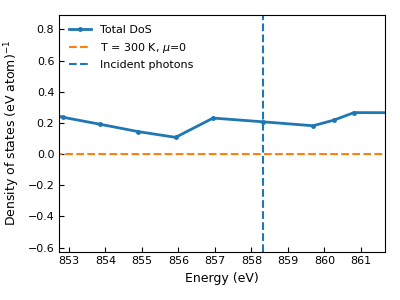

In [38]:
plt.figure(figsize=(4,3))
plt.plot(PAR.E_j+PAR.E_f,PAR.m_j/PAR.enax_dE_j,'.-', lw=2,ms = 5, label ='Total DoS')
plt.plot(PAR.E_j+PAR.E_f,PAR.FermiSolver.fermi(300*PAR.kB,0)*PAR.m_j/PAR.enax_dE_j, ls='--', label = 'T = 300 K, $\\mu$=0')
#plt.plot(PAR.E_j+PAR.E_f,PAR.FermiSolver.fermi(300*PAR.kB,10)*PAR.m_j/PAR.enax_dE_j, ls=':',label = 'T = 300 K, $\\mu$=10')
#plt.plot(PAR.E_j+PAR.E_f,PAR.FermiSolver.fermi(1e5*PAR.kB,0)*PAR.m_j/PAR.enax_dE_j, ls='-.', label = 'T = 1e5 K, $\\mu$=0')
#plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e6*PAR.kB,0)*PAR.m_j/PAR.enax_dE_j, label = '1e6 K, mu=0')
for ei in PAR.E_i:
    plt.axvline(ei+PAR.E_f, ls='--', label = 'Incident photons')
plt.legend()
plt.axvline(PAR.E_f, ls=':',c='k', label = '$E_F$')

plt.xlim(-10+PAR.E_f,135+PAR.E_f)
plt.xlabel('Energy (eV)')
plt.ylabel('Density of states (eV atom)$^{-1}$')
plt.tight_layout()

In [39]:
PAR.m_j[PAR.resonant]

array([0.28343705])

t:  -45.0
-22.62083216363108 10.000023811438224 -> 300.0 0.0
Photons impinging per atom this timestep:  [0.1674232] i.e.  [0.00183176] /atom
t:  -44.999200994123605
-22.6208315779444 10.000023878716132 -> 150.05349883740345 0.14090427058056776
Photons impinging per atom this timestep:  [0.16745882] i.e.  [0.00183215] /atom
t:  -44.99386128131453
-22.620827663832156 10.00002432833074 -> 62.468280878472356 0.22338499896726002
Photons impinging per atom this timestep:  [0.16769707] i.e.  [0.00183476] /atom
t:  -44.9907919219718
-22.620825218572435 10.000024582267246 -> 164.1903762688472 0.1289414029841454
Photons impinging per atom this timestep:  [0.16783416] i.e.  [0.00183626] /atom
t:  -44.975445125258126
-22.620812612234083 10.00002584743134 -> 536.8674501356102 -0.19367222219273053
Photons impinging per atom this timestep:  [0.16852114] i.e.  [0.00184378] /atom
t:  -44.97271680584236
-22.62081011732978 10.00002607021835 -> 541.1865269968094 -0.19484845117275093
Photons impinging per 

t:  -43.09522524797152
-22.585132504157716 10.000076791209036 -> 1495.0212603882924 -0.1798061860058844
Photons impinging per atom this timestep:  [0.27505719] i.e.  [0.00300938] /atom
t:  -43.06855858130485
-22.58390528219421 10.00007686772036 -> 1508.0285202366192 -0.1793173929217977
Photons impinging per atom this timestep:  [0.27693338] i.e.  [0.00302991] /atom
t:  -43.03522524797152
-22.582369837388562 10.000076869277452 -> 1524.0218651250375 -0.17871459386479166
Photons impinging per atom this timestep:  [0.27929497] i.e.  [0.00305574] /atom
t:  -43.03522524797152
-22.5824028786805 10.000076778536386 -> 1523.6806235022214 -0.17872764092824936
Photons impinging per atom this timestep:  [0.27929497] i.e.  [0.00305574] /atom
t:  -42.975225247971515
-22.579604703123696 10.00007677917291 -> 1552.1027007236994 -0.17765109095226328
Photons impinging per atom this timestep:  [0.283592] i.e.  [0.00310276] /atom
t:  -42.94522524797152
-22.57807522371626 10.000076744944383 -> 1567.270698766

Photons impinging per atom this timestep:  [0.47746981] i.e.  [0.00522396] /atom
t:  -40.84522524797154
-22.397237857353243 10.000071976932489 -> 2869.4971791114835 -0.1191724916412309
Photons impinging per atom this timestep:  [0.48094563] i.e.  [0.00526199] /atom
t:  -40.69522524797154
-22.377972461917548 10.000071920741593 -> 2995.3971099762357 -0.11262505343224567
Photons impinging per atom this timestep:  [0.49866814] i.e.  [0.00545589] /atom
t:  -40.66855858130487
-22.37443215948426 10.000071867282168 -> 3018.5329749795783 -0.11140297184792151
Photons impinging per atom this timestep:  [0.5018795] i.e.  [0.00549102] /atom
t:  -40.63522524797154
-22.36999396469445 10.000071876633818 -> 3047.5403391807195 -0.10986238994837208
Photons impinging per atom this timestep:  [0.50591981] i.e.  [0.00553523] /atom
t:  -40.63522524797154
-22.370021978992007 10.000071955140546 -> 3047.3573659537624 -0.10987208661520986
Photons impinging per atom this timestep:  [0.50591981] i.e.  [0.00553523]

Photons impinging per atom this timestep:  [0.82738125] i.e.  [0.00905231] /atom
t:  -38.47522524797156
-21.971777601161108 10.000079810633856 -> 5663.080976109045 0.06459695838682099
Photons impinging per atom this timestep:  [0.83876962] i.e.  [0.00917691] /atom
t:  -38.445225247971564
-21.964395187440655 10.000080019961848 -> 5710.768099478968 0.06835315101602894
Photons impinging per atom this timestep:  [0.84451571] i.e.  [0.00923978] /atom
t:  -38.295225247971565
-21.927166535146174 10.00008102041764 -> 5950.42327538004 0.08748765088472507
Photons impinging per atom this timestep:  [0.87377225] i.e.  [0.00955987] /atom
t:  -38.268558581304895
-21.920360048803296 10.000081118680377 -> 5994.090032212953 0.09101915835824635
Photons impinging per atom this timestep:  [0.87906627] i.e.  [0.00961779] /atom
t:  -38.23522524797156
-21.911853053375435 10.00008136509821 -> 6048.602144022254 0.09544687894206343
Photons impinging per atom this timestep:  [0.88572369] i.e.  [0.00969063] /atom

t:  -36.04522524797159
-21.175125123751823 10.000102302613179 -> 10575.982331068351 0.5154133861220515
Photons impinging per atom this timestep:  [1.43323531] i.e.  [0.01568091] /atom
t:  -35.89522524797159
-21.109686238049953 10.00010395623565 -> 10967.048490191757 0.5548581455379951
Photons impinging per atom this timestep:  [1.47973139] i.e.  [0.01618962] /atom
t:  -35.86855858130492
-21.09775099860773 10.000104130986855 -> 11038.260777064528 0.5620731909890233
Photons impinging per atom this timestep:  [1.48813315] i.e.  [0.01628154] /atom
t:  -35.835225247971586
-21.082835821017856 10.00010452441519 -> 11127.206050132732 0.5710982496282063
Photons impinging per atom this timestep:  [1.4986936] i.e.  [0.01639709] /atom
t:  -35.835225247971586
-21.08293945730957 10.00010471265207 -> 11126.588841984643 0.5710357301754729
Photons impinging per atom this timestep:  [1.4986936] i.e.  [0.01639709] /atom
t:  -35.77522524797158
-21.055975953281173 10.000105410446913 -> 11287.25144987091 0.

t:  -33.43522524797161
-19.66542544239216 10.000134496901856 -> 19255.735072811316 1.418767437554657
Photons impinging per atom this timestep:  [2.4508992] i.e.  [0.02681509] /atom
t:  -33.43522524797161
-19.665575524354622 10.000134757235962 -> 19254.925036574426 1.418683769024551
Photons impinging per atom this timestep:  [2.4508992] i.e.  [0.02681509] /atom
t:  -33.375225247971606
-19.620327363987855 10.000135504710482 -> 19498.770491541003 1.4439342138906026
Photons impinging per atom this timestep:  [2.48013954] i.e.  [0.02713501] /atom
t:  -33.34522524797161
-19.597069055550392 10.000135878125405 -> 19623.624949515055 1.4568445863676172
Photons impinging per atom this timestep:  [2.49487033] i.e.  [0.02729617] /atom
t:  -33.195225247971614
-19.47995507743714 10.000137620517092 -> 20247.229170885235 1.5211284242243952
Photons impinging per atom this timestep:  [2.56964188] i.e.  [0.02811424] /atom
t:  -33.16855858130494
-19.458648938070258 10.000137751467554 -> 20359.75825666435 1

Photons impinging per atom this timestep:  [3.9382521] i.e.  [0.0430881] /atom
t:  -30.795225247971615
-17.039080153106337 10.000155136962245 -> 31406.039195010337 2.5886802792618675
Photons impinging per atom this timestep:  [4.04765056] i.e.  [0.04428502] /atom
t:  -30.76855858130495
-17.0049484289385 10.000154904387083 -> 31540.882530839248 2.6004316629224355
Photons impinging per atom this timestep:  [4.06735824] i.e.  [0.04450064] /atom
t:  -30.735225247971616
-16.962234434421262 10.000154880261915 -> 31708.954743770915 2.6150375166120736
Photons impinging per atom this timestep:  [4.09210362] i.e.  [0.04477137] /atom
t:  -30.735225247971616
-16.96242531530088 10.000155180956625 -> 31708.2054866037 2.6149729350466044
Photons impinging per atom this timestep:  [4.09210362] i.e.  [0.04477137] /atom
t:  -30.675225247971618
-16.88527337492133 10.000155111116502 -> 32009.903332136506 2.641075024115435
Photons impinging per atom this timestep:  [4.13695675] i.e.  [0.04526211] /atom
t:  

Photons impinging per atom this timestep:  [5.9175874] i.e.  [0.06474384] /atom
t:  -28.63522524797161
-13.681139771403272 10.00012713389545 -> 42717.39147008654 3.467511537250182
Photons impinging per atom this timestep:  [5.9175874] i.e.  [0.06474384] /atom
t:  -28.575225247971613
-13.569308748394652 10.000125486086194 -> 43034.90717107625 3.488948494664457
Photons impinging per atom this timestep:  [5.97799085] i.e.  [0.06540471] /atom
t:  -28.54522524797161
-13.51213614912007 10.000124605732323 -> 43195.93573967129 3.499749720753328
Photons impinging per atom this timestep:  [6.0083754] i.e.  [0.06573715] /atom
t:  -28.39522524797161
-13.224732833964005 10.000120029767324 -> 43992.3252885661 3.552466364125722
Photons impinging per atom this timestep:  [6.1621382] i.e.  [0.06741946] /atom
t:  -28.368558581304946
-13.17276274444484 10.000119021411486 -> 44134.03598955882 3.5617234215213966
Photons impinging per atom this timestep:  [6.18979663] i.e.  [0.06772206] /atom
t:  -28.335225

Photons impinging per atom this timestep:  [8.45544863] i.e.  [0.09251038] /atom
t:  -26.295225247971604
-8.400350514000053 10.000019104219174 -> 54717.20708544782 4.1400996891312305
Photons impinging per atom this timestep:  [8.65568705] i.e.  [0.09470117] /atom
t:  -26.26855858130494
-8.32864815921597 10.000017226097913 -> 54847.2068260527 4.145715413974502
Photons impinging per atom this timestep:  [8.6916571] i.e.  [0.09509472] /atom
t:  -26.235225247971606
-8.238814751301268 10.000015012980935 -> 55009.14822029173 4.152657025576307
Photons impinging per atom this timestep:  [8.73677824] i.e.  [0.09558838] /atom
t:  -26.235225247971606
-8.238997900562214 10.000015180461808 -> 55008.81857563457 4.152643246793477
Photons impinging per atom this timestep:  [8.73677824] i.e.  [0.09558838] /atom
t:  -26.175225247971607
-8.076887072424809 10.000011171877018 -> 55298.48151376175 4.1649093993990665
Photons impinging per atom this timestep:  [8.81844128] i.e.  [0.09648185] /atom
t:  -26.145

Photons impinging per atom this timestep:  [12.04984829] i.e.  [0.13183641] /atom
t:  -24.0452252479716
-1.3429645422075551 9.999825303300039 -> 65193.53122742462 4.4615691883202375
Photons impinging per atom this timestep:  [12.10142381] i.e.  [0.1324007] /atom
t:  -23.8952252479716
-0.7950428601737602 9.999808948358249 -> 65867.63932588708 4.472744795732684
Photons impinging per atom this timestep:  [12.36164414] i.e.  [0.13524775] /atom
t:  -23.868558581304935
-0.6964627617771664 9.99980595204224 -> 65987.42641854487 4.474606435602658
Photons impinging per atom this timestep:  [12.40831497] i.e.  [0.13575837] /atom
t:  -23.8352252479716
-0.5729426853638186 9.999802244598575 -> 66136.89351206111 4.476876821191575
Photons impinging per atom this timestep:  [12.4668276] i.e.  [0.13639855] /atom
t:  -23.8352252479716
-0.5731046921670491 9.999802310186764 -> 66136.69766973786 4.476873997285372
Photons impinging per atom this timestep:  [12.4668276] i.e.  [0.13639855] /atom
t:  -23.775225

Photons impinging per atom this timestep:  [17.06274652] i.e.  [0.18668213] /atom
t:  -21.46855858130493
9.541901878632771 9.999479876731899 -> 76690.64474228527 4.489299677031881
Photons impinging per atom this timestep:  [17.12068135] i.e.  [0.18731599] /atom
t:  -21.435225247971594
9.704015583605415 9.99947446221053 -> 76840.40793056402 4.487401711102791
Photons impinging per atom this timestep:  [17.19327486] i.e.  [0.18811023] /atom
t:  -21.435225247971594
9.703890525176758 9.999474400349536 -> 76840.29290205265 4.4874030664582065
Photons impinging per atom this timestep:  [17.19327486] i.e.  [0.18811023] /atom
t:  -21.375225247971596
9.996217338813292 9.999464638692928 -> 77109.24866177529 4.4838524666097515
Photons impinging per atom this timestep:  [17.32443268] i.e.  [0.18954522] /atom
t:  -21.345225247971594
10.14443801612261 9.999459665344906 -> 77245.08720508551 4.481989866007149
Photons impinging per atom this timestep:  [17.3902474] i.e.  [0.19026529] /atom
t:  -21.195225

Photons impinging per atom this timestep:  [23.07223331] i.e.  [0.25243144] /atom
t:  -18.94522524797159
23.45051392325132 9.998998684320734 -> 88389.1186810881 4.178037252376313
Photons impinging per atom this timestep:  [23.15001883] i.e.  [0.25328248] /atom
t:  -18.795225247971587
24.384008633467793 9.998965589652567 -> 89116.10672133157 4.148425778084496
Photons impinging per atom this timestep:  [23.54101725] i.e.  [0.25756036] /atom
t:  -18.768558581304923
24.551275520909062 9.998959800136966 -> 89245.84826053672 4.143023741936423
Photons impinging per atom this timestep:  [23.61088718] i.e.  [0.25832481] /atom
t:  -18.735225247971588
24.760844744378275 9.99895233073619 -> 89408.18623920003 4.136214188924159
Photons impinging per atom this timestep:  [23.69837605] i.e.  [0.25928201] /atom
t:  -18.735225247971588
24.760785186162135 9.998952105489408 -> 89408.14152670973 4.136215644273331
Photons impinging per atom this timestep:  [23.69837605] i.e.  [0.25928201] /atom
t:  -18.6752

Photons impinging per atom this timestep:  [29.52282702] i.e.  [0.32300686] /atom
t:  -16.575225247971584
39.62705403101645 9.998417810236495 -> 100488.8306722933 3.54949146316516
Photons impinging per atom this timestep:  [29.69738836] i.e.  [0.32491672] /atom
t:  -16.545225247971583
39.85236795122701 9.998409682672664 -> 100652.38435216622 3.5391651644448343
Photons impinging per atom this timestep:  [29.78481777] i.e.  [0.32587328] /atom
t:  -16.39522524797158
40.98135764456866 9.998369120687572 -> 101470.78711588577 3.4868257358263266
Photons impinging per atom this timestep:  [30.22342651] i.e.  [0.33067206] /atom
t:  -16.368558581304917
41.183330902509994 9.998362102547972 -> 101617.01005408431 3.4773584309793155
Photons impinging per atom this timestep:  [30.30165252] i.e.  [0.33152793] /atom
t:  -16.335225247971582
41.43635360427001 9.99835297527823 -> 101800.11939128797 3.4654529287897717
Photons impinging per atom this timestep:  [30.39953995] i.e.  [0.33259891] /atom
t:  -16

59.093089326167004 9.997723848249068 -> 114505.73512452071 2.5171353979820106
Photons impinging per atom this timestep:  [36.9440831] i.e.  [0.40420222] /atom
t:  -14.145225247971577
59.356452566612205 9.997714636636575 -> 114695.86483649825 2.5012788825326826
Photons impinging per atom this timestep:  [37.03706438] i.e.  [0.40521952] /atom
t:  -13.995225247971577
60.67550984605574 9.997668735088887 -> 115649.08757522824 2.4211126429377576
Photons impinging per atom this timestep:  [37.50249698] i.e.  [0.41031178] /atom
t:  -13.96855858130491
60.91115376371261 9.997660854328561 -> 115819.55206183867 2.4066605802625665
Photons impinging per atom this timestep:  [37.58532691] i.e.  [0.41121802] /atom
t:  -13.935225247971577
61.206303410463114 9.997650561386541 -> 116033.14710638713 2.3885016322781176
Photons impinging per atom this timestep:  [37.68889863] i.e.  [0.41235119] /atom
t:  -13.935225247971577
61.206386725250965 9.997650092547595 -> 116033.2115449618 2.388495260565214
Photons 

Photons impinging per atom this timestep:  [45.05763172] i.e.  [0.4929719] /atom
t:  -11.535225247971571
83.89006969955793 9.99689044185912 -> 132875.96205447553 0.802280608065104
Photons impinging per atom this timestep:  [45.16041166] i.e.  [0.49409641] /atom
t:  -11.535225247971571
83.89021016447732 9.996889916473094 -> 132876.07558381834 0.8022679849923074
Photons impinging per atom this timestep:  [45.16041166] i.e.  [0.49409641] /atom
t:  -11.47522524797157
84.49126109479354 9.996870666527071 -> 133337.7780003517 0.7549669809365526
Photons impinging per atom this timestep:  [45.34525544] i.e.  [0.49611877] /atom
t:  -11.445225247971571
84.79361172820691 9.996861033330157 -> 133570.40302906028 0.7310660833626466
Photons impinging per atom this timestep:  [45.43759789] i.e.  [0.49712908] /atom
t:  -11.29522524797157
86.30727822165893 9.996813100883598 -> 134738.81272057956 0.6103302468583887
Photons impinging per atom this timestep:  [45.89847195] i.e.  [0.50217147] /atom
t:  -11.2

Photons impinging per atom this timestep:  [52.46917786] i.e.  [0.57406103] /atom
t:  -9.045225247971565
110.15466560974905 9.996102895301748 -> 154137.3745683109 -1.543096748870126
Photons impinging per atom this timestep:  [52.55363319] i.e.  [0.57498505] /atom
t:  -8.895225247971565
111.81571673002618 9.996057177554599 -> 155568.55495246616 -1.7118062704283574
Photons impinging per atom this timestep:  [52.97372157] i.e.  [0.5795812] /atom
t:  -8.868558581304898
112.11176490569284 9.996049420103647 -> 155824.85403474377 -1.7421456906042834
Photons impinging per atom this timestep:  [53.04801533] i.e.  [0.58039404] /atom
t:  -8.835225247971564
112.48237301354406 9.996039251536589 -> 156146.2365267745 -1.7802444157106923
Photons impinging per atom this timestep:  [53.14071463] i.e.  [0.58140826] /atom
t:  -8.835225247971564
112.48255368820547 9.996038721052594 -> 156146.40097690836 -1.7802650057751268
Photons impinging per atom this timestep:  [53.14071463] i.e.  [0.58140826] /atom
t:

136.59745527108615 9.995431071874087 -> 178431.91262095462 -4.554271166387815
Photons impinging per atom this timestep:  [58.53839558] i.e.  [0.64046385] /atom
t:  -6.675225247971564
137.30648055325727 9.995414767482146 -> 179131.2216729006 -4.645123108147014
Photons impinging per atom this timestep:  [58.67791536] i.e.  [0.64199032] /atom
t:  -6.645225247971564
137.6621807002095 9.995406684021036 -> 179483.05391098597 -4.690911214952247
Photons impinging per atom this timestep:  [58.74733061] i.e.  [0.64274979] /atom
t:  -6.495225247971564
139.44185156646762 9.995366567777435 -> 181253.53952341306 -4.922123158526796
Photons impinging per atom this timestep:  [59.0909201] i.e.  [0.64650897] /atom
t:  -6.468558581304897
139.7587796170759 9.995359805281286 -> 181570.61162250096 -4.963668859992467
Photons impinging per atom this timestep:  [59.15138825] i.e.  [0.64717055] /atom
t:  -6.435225247971564
140.15542017816009 9.995350918506857 -> 181968.2050364938 -5.015825402238716
Photons impi

t:  -4.335225247971565
165.7205690917144 9.994839616004075 -> 209444.97647023597 -8.765378302264283
Photons impinging per atom this timestep:  [63.32559696] i.e.  [0.69284023] /atom
t:  -4.275225247971566
166.46562442179697 9.994826477070012 -> 210301.23616658617 -8.886424499823413
Photons impinging per atom this timestep:  [63.42246303] i.e.  [0.69390003] /atom
t:  -4.2452252479715655
166.83898955278454 9.994819998800239 -> 210731.5054436502 -8.947337909847676
Photons impinging per atom this timestep:  [63.4704446] i.e.  [0.694425] /atom
t:  -4.095225247971565
168.7065910022752 9.994787912492987 -> 212895.5279496849 -9.254584510191814
Photons impinging per atom this timestep:  [63.70580836] i.e.  [0.69700009] /atom
t:  -4.068558581304899
169.03894107867023 9.994782562825229 -> 213282.67330903065 -9.309704934199027
Photons impinging per atom this timestep:  [63.74685357] i.e.  [0.69744916] /atom
t:  -4.035225247971566
169.45478104059993 9.994775485818693 -> 213767.9547751187 -9.3788643

Photons impinging per atom this timestep:  [66.39732394] i.e.  [0.72644775] /atom
t:  -1.6352252479715665
199.88138775421865 9.99434185478794 -> 251729.65238535526 -14.996922044374257
Photons impinging per atom this timestep:  [66.41896084] i.e.  [0.72668447] /atom
t:  -1.6352252479715665
199.88160527324638 9.994341429510333 -> 251729.9524598824 -14.99696911550922
Photons impinging per atom this timestep:  [66.41896084] i.e.  [0.72668447] /atom
t:  -1.5752252479715665
200.65212331549466 9.994332495000405 -> 252747.66441601835 -15.152812902578676
Photons impinging per atom this timestep:  [66.45682396] i.e.  [0.72709873] /atom
t:  -1.5452252479715665
201.03781545634658 9.994328129804067 -> 253257.98200534668 -15.231054346677684
Photons impinging per atom this timestep:  [66.47523259] i.e.  [0.72730014] /atom
t:  -1.3952252479715666
202.96659521376102 9.994306602483949 -> 255818.74063741925 -15.624629359354664
Photons impinging per atom this timestep:  [66.56203498] i.e.  [0.72824984] /a

t:  0.7047747520284335
230.14310730946414 9.994067467717771 -> 293120.78697093524 -21.530374337015388
Photons impinging per atom this timestep:  [66.84818487] i.e.  [0.73138058] /atom
t:  0.7314414186951003
230.48927460799445 9.994065489686914 -> 293606.53478583007 -21.60931342433305
Photons impinging per atom this timestep:  [66.84061067] i.e.  [0.73129771] /atom
t:  0.7647747520284336
230.9222281530719 9.994062679007031 -> 294214.31432612543 -21.708155991142807
Photons impinging per atom this timestep:  [66.83074867] i.e.  [0.73118981] /atom
t:  0.7647747520284336
230.92245978665431 9.994062273669842 -> 294214.6543908317 -21.708212567167447
Photons impinging per atom this timestep:  [66.83074867] i.e.  [0.73118981] /atom
t:  0.8247747520284336
231.70175924820992 9.994057257021288 -> 295309.28247631673 -21.886429500503876
Photons impinging per atom this timestep:  [66.8118938] i.e.  [0.73098352] /atom
t:  0.8547747520284336
232.0914665855181 9.99405485220262 -> 295856.9767787523 -21.9

t:  3.1647747520284333
262.04294845986954 9.993939765647763 -> 338191.1357927554 -29.062348246234198
Photons impinging per atom this timestep:  [64.99180321] i.e.  [0.71107006] /atom
t:  3.2247747520284333
262.8173363021792 9.993938644535488 -> 339283.5900155089 -29.249967901406375
Photons impinging per atom this timestep:  [64.91812873] i.e.  [0.71026399] /atom
t:  3.254774752028433
263.2041936822305 9.993938185531404 -> 339829.1643821025 -29.343752562823795
Photons impinging per atom this timestep:  [64.88080453] i.e.  [0.70985563] /atom
t:  3.404774752028433
265.1379258701078 9.99393617476601 -> 342554.3947374268 -29.813089583680732
Photons impinging per atom this timestep:  [64.68933748] i.e.  [0.7077608] /atom
t:  3.4314414186951
265.48132160983266 9.993936133292717 -> 343037.99493721745 -29.89652469055111
Photons impinging per atom this timestep:  [64.65445693] i.e.  [0.70737918] /atom
t:  3.464774752028433
265.9107154903389 9.993935754021855 -> 343642.5683991397 -30.000896241759

t:  5.564774752028432
292.68364761879263 9.9939708694941 -> 380880.24544170016 -36.56387367371889
Photons impinging per atom this timestep:  [61.08560192] i.e.  [0.66833262] /atom
t:  5.624774752028432
293.43890726450996 9.993973512580409 -> 381914.7469218586 -36.749918095115646
Photons impinging per atom this timestep:  [60.96438737] i.e.  [0.66700643] /atom
t:  5.654774752028432
293.81579812072135 9.993974930208422 -> 382430.60920358874 -36.842764404023946
Photons impinging per atom this timestep:  [60.90338381] i.e.  [0.66633899] /atom
t:  5.8047747520284325
295.69925006268875 9.993982289340567 -> 385004.7900020724 -37.30680820855185
Photons impinging per atom this timestep:  [60.59443988] i.e.  [0.66295886] /atom
t:  5.831441418695099
296.03347202087053 9.993983900309852 -> 385460.9122198934 -37.38915938000963
Photons impinging per atom this timestep:  [60.538837] i.e.  [0.66235051] /atom
t:  5.864774752028432
296.45130108810343 9.99398559848759 -> 386030.868482017 -37.492118130664

Photons impinging per atom this timestep:  [55.64684949] i.e.  [0.60882767] /atom
t:  7.931441418695098
321.87337914239527 9.994144239942687 -> 420088.1931651006 -43.751936206135845
Photons impinging per atom this timestep:  [55.57736742] i.e.  [0.60806748] /atom
t:  7.964774752028431
322.27466347462297 9.994147613176182 -> 420615.66976912064 -43.85053485167771
Photons impinging per atom this timestep:  [55.49030848] i.e.  [0.60711497] /atom
t:  7.964774752028431
322.2748991893436 9.99414725889515 -> 420615.99581423536 -43.850597306911894
Photons impinging per atom this timestep:  [55.49030848] i.e.  [0.60711497] /atom
t:  8.024774752028431
322.99690068018197 9.994153367891855 -> 421564.2413125946 -44.02797351037849
Photons impinging per atom this timestep:  [55.33302912] i.e.  [0.60539419] /atom
t:  8.05477475202843
323.356774595005 9.994156507469098 -> 422036.49450891005 -44.116371574126426
Photons impinging per atom this timestep:  [55.25411531] i.e.  [0.6045308] /atom
t:  8.2047747

Photons impinging per atom this timestep:  [48.81798466] i.e.  [0.53411362] /atom
t:  10.364774752028437
350.2680003782254 9.99445308835985 -> 456625.62126698403 -50.6982255925146
Photons impinging per atom this timestep:  [48.71844647] i.e.  [0.53302458] /atom
t:  10.364774752028437
350.2682067104663 9.994452774439411 -> 456625.89604043076 -50.6982801397042
Photons impinging per atom this timestep:  [48.71844647] i.e.  [0.53302458] /atom
t:  10.424774752028437
350.9438137242193 9.994461840255997 -> 457476.0573850313 -50.862696777191815
Photons impinging per atom this timestep:  [48.53898471] i.e.  [0.5310611] /atom
t:  10.454774752028436
351.28014372334206 9.994466441903906 -> 457898.9551920502 -50.944529465539254
Photons impinging per atom this timestep:  [48.44911486] i.e.  [0.53007784] /atom
t:  10.604774752028437
352.960010265726 9.994489659248075 -> 460007.96977783804 -51.35309754812847
Photons impinging per atom this timestep:  [47.99842103] i.e.  [0.52514684] /atom
t:  10.63144

t:  12.731441418695109
375.8295093578252 9.994857527866229 -> 488197.1495029659 -56.88763876163081
Photons impinging per atom this timestep:  [41.44381557] i.e.  [0.45343343] /atom
t:  12.764774752028442
376.17307955138887 9.994863822171641 -> 488613.42162003374 -56.97038626916129
Photons impinging per atom this timestep:  [41.33973932] i.e.  [0.45229474] /atom
t:  12.764774752028442
376.17324292361513 9.994863565946016 -> 488613.63214889396 -56.97042936745422
Photons impinging per atom this timestep:  [41.33973932] i.e.  [0.45229474] /atom
t:  12.824774752028443
376.7912133108385 9.99487492052437 -> 489361.84878422203 -57.119235692382254
Photons impinging per atom this timestep:  [41.15237845] i.e.  [0.45024484] /atom
t:  12.854774752028442
377.09844273531536 9.994880647491268 -> 489733.5794562646 -57.19320106738063
Photons impinging per atom this timestep:  [41.0586887] i.e.  [0.44921979] /atom
t:  13.004774752028442
378.6325257216573 9.994909443883675 -> 491587.27090432105 -57.56239

Photons impinging per atom this timestep:  [34.08581153] i.e.  [0.3729301] /atom
t:  15.131441418695115
399.28369974319656 9.995344478123553 -> 516152.670142659 -62.50964059748333
Photons impinging per atom this timestep:  [34.00459672] i.e.  [0.37204154] /atom
t:  15.164774752028448
399.5904803841612 9.995351647034232 -> 516512.3210997436 -62.582821409930574
Photons impinging per atom this timestep:  [33.90314967] i.e.  [0.37093162] /atom
t:  15.164774752028448
399.59059125184086 9.995351465208037 -> 516512.46026106784 -62.582850658545986
Photons impinging per atom this timestep:  [33.90314967] i.e.  [0.37093162] /atom
t:  15.224774752028448
400.14229811983716 9.995364386011925 -> 517158.8724040877 -62.71443510404883
Photons impinging per atom this timestep:  [33.72074835] i.e.  [0.36893598] /atom
t:  15.254774752028448
400.4161951168781 9.995370877268291 -> 517479.60415446904 -62.779749186335444
Photons impinging per atom this timestep:  [33.62964739] i.e.  [0.36793925] /atom
t:  15.

Photons impinging per atom this timestep:  [26.70530105] i.e.  [0.29218054] /atom
t:  17.65477475202845
420.95398230344045 9.995908757473554 -> 541200.6299191586 -67.65744082185377
Photons impinging per atom this timestep:  [26.62180897] i.e.  [0.29126706] /atom
t:  17.804774752028454
422.14115772663337 9.99594337686691 -> 542552.6229315501 -67.93822885562402
Photons impinging per atom this timestep:  [26.20615428] i.e.  [0.28671941] /atom
t:  17.831441418695118
422.35097726208113 9.995949594329586 -> 542791.358386516 -67.98784117043566
Photons impinging per atom this timestep:  [26.13257822] i.e.  [0.28591442] /atom
t:  17.864774752028453
422.6127851352202 9.995957292933609 -> 543089.162246856 -68.04974208662867
Photons impinging per atom this timestep:  [26.04074448] i.e.  [0.28490968] /atom
t:  17.864774752028453
422.6128305954787 9.995957208537154 -> 543089.218334988 -68.04975419785957
Photons impinging per atom this timestep:  [26.04074448] i.e.  [0.28490968] /atom
t:  17.92477475

Photons impinging per atom this timestep:  [19.94370896] i.e.  [0.21820251] /atom
t:  20.26477475202846
439.9635593971765 9.996517618113387 -> 562612.0293028249 -72.13905861447775
Photons impinging per atom this timestep:  [19.86421841] i.e.  [0.21733281] /atom
t:  20.26477475202846
439.96354589335147 9.996517622181319 -> 562612.0140311581 -72.13905536691138
Photons impinging per atom this timestep:  [19.86421841] i.e.  [0.21733281] /atom
t:  20.324774752028457
440.3603476670243 9.996531685152124 -> 563053.7039601479 -72.2322828455451
Photons impinging per atom this timestep:  [19.72160624] i.e.  [0.2157725] /atom
t:  20.354774752028458
440.55667746712794 9.996538714632333 -> 563272.1639830017 -72.27840446738253
Photons impinging per atom this timestep:  [19.65052759] i.e.  [0.21499483] /atom
t:  20.50477475202846
441.5360434669664 9.996573850951869 -> 564361.172022328 -72.5084322369262
Photons impinging per atom this timestep:  [19.29741697] i.e.  [0.21113148] /atom
t:  20.53144141869

Photons impinging per atom this timestep:  [14.71050585] i.e.  [0.16094645] /atom
t:  22.664774752028464
454.37955437204175 9.99707521500113 -> 578527.6324435216 -75.51794674328293
Photons impinging per atom this timestep:  [14.64493936] i.e.  [0.1602291] /atom
t:  22.664774752028464
454.37948625199925 9.997075297304454 -> 578527.5533615905 -75.5179293794988
Photons impinging per atom this timestep:  [14.64493936] i.e.  [0.1602291] /atom
t:  22.724774752028463
454.7040315137575 9.997089036841615 -> 578882.8182509356 -75.59380944171306
Photons impinging per atom this timestep:  [14.52741456] i.e.  [0.15894327] /atom
t:  22.754774752028464
454.8643256244783 9.997095892244511 -> 579058.2339950686 -75.63128306373994
Photons impinging per atom this timestep:  [14.46889072] i.e.  [0.15830296] /atom
t:  22.904774752028466
455.66365554769186 9.997130110825797 -> 579932.5031212829 -75.81812407339899
Photons impinging per atom this timestep:  [14.1786564] i.e.  [0.15512753] /atom
t:  22.93144141

Photons impinging per atom this timestep:  [10.3426633] i.e.  [0.11315824] /atom
t:  25.15477475202847
466.37458366427995 9.997630104289579 -> 591572.0000276738 -78.31697546772017
Photons impinging per atom this timestep:  [10.29661012] i.e.  [0.11265438] /atom
t:  25.30477475202847
467.0062404716495 9.997662280120435 -> 592254.0897895751 -78.4640628967558
Photons impinging per atom this timestep:  [10.06859764] i.e.  [0.11015971] /atom
t:  25.331441418695135
467.11757293137026 9.997667889200846 -> 592374.2671789875 -78.48998620590822
Photons impinging per atom this timestep:  [10.02845415] i.e.  [0.1097205] /atom
t:  25.36477475202847
467.256180513774 9.99767502653579 -> 592523.8585089416 -78.52225666956386
Photons impinging per atom this timestep:  [9.97844075] i.e.  [0.10917331] /atom
t:  25.36477475202847
467.2560625443626 9.997675172142655 -> 592523.7230826438 -78.52222658842351
Photons impinging per atom this timestep:  [9.97844075] i.e.  [0.10917331] /atom
t:  25.42477475202847


t:  27.73144141869514
475.9006383252435 9.998158641520844 -> 601808.3910093374 -80.5318393513426
Photons impinging per atom this timestep:  [6.88020606] i.e.  [0.07527578] /atom
t:  27.764774752028476
476.0063031664748 9.99816510488441 -> 601921.3351352173 -80.55636571201832
Photons impinging per atom this timestep:  [6.84265355] i.e.  [0.07486492] /atom
t:  27.764774752028476
476.0061559179188 9.998165278883715 -> 601921.1678706296 -80.55632832938284
Photons impinging per atom this timestep:  [6.84265355] i.e.  [0.07486492] /atom
t:  27.824774752028475
476.1959923553782 9.998176894432437 -> 602124.0512331752 -80.60039042551703
Photons impinging per atom this timestep:  [6.77546253] i.e.  [0.07412979] /atom
t:  27.854774752028476
476.28936638581325 9.998182666327997 -> 602223.8249203007 -80.62206124740162
Photons impinging per atom this timestep:  [6.74206099] i.e.  [0.07376434] /atom
t:  28.004774752028478
476.7546332957377 9.998211406535745 -> 602720.8388361473 -80.73003591673967
Pho

t:  30.16477475202848
482.5636478165567 9.998600304253436 -> 608904.8130058148 -82.07654104791318
Photons impinging per atom this timestep:  [4.53507455] i.e.  [0.04961788] /atom
t:  30.16477475202848
482.56348767386123 9.998600481129321 -> 608904.6328313936 -82.07650063248157
Photons impinging per atom this timestep:  [4.53507455] i.e.  [0.04961788] /atom
t:  30.22477475202848
482.70309521197163 9.998610585885164 -> 609052.7642324232 -82.1088236967348
Photons impinging per atom this timestep:  [4.48671803] i.e.  [0.04908882] /atom
t:  30.25477475202848
482.77162050559485 9.998615595715496 -> 609125.4630860587 -82.1246879333072
Photons impinging per atom this timestep:  [4.46269783] i.e.  [0.04882602] /atom
t:  30.404774752028484
483.11294636216235 9.99864051884857 -> 609487.5047658009 -82.20370457015862
Photons impinging per atom this timestep:  [4.34416497] i.e.  [0.04752916] /atom
t:  30.431441418695147
483.17300297704037 9.998644809148402 -> 609551.1986947078 -82.2176086201992
Phot

Photons impinging per atom this timestep:  [2.87155155] i.e.  [0.03141741] /atom
t:  32.65477475202848
487.4502179244211 9.99898393444254 -> 614075.8384539151 -83.20673048478523
Photons impinging per atom this timestep:  [2.85496177] i.e.  [0.03123591] /atom
t:  32.80477475202848
487.69154080677566 9.999004638625074 -> 614330.4636323439 -83.26247872117517
Photons impinging per atom this timestep:  [2.77321793] i.e.  [0.03034155] /atom
t:  32.83144141869515
487.73397169043824 9.999008189613901 -> 614375.2320168386 -83.27228198195102
Photons impinging per atom this timestep:  [2.75889422] i.e.  [0.03018484] /atom
t:  32.86477475202848
487.7866133250168 9.999012759175685 -> 614430.7620918343 -83.28444127217843
Photons impinging per atom this timestep:  [2.74107735] i.e.  [0.02998991] /atom
t:  32.86477475202848
487.78645727590606 9.999012916090042 -> 614430.5881727478 -83.2844021827103
Photons impinging per atom this timestep:  [2.74107735] i.e.  [0.02998991] /atom
t:  32.92477475202848
4

Photons impinging per atom this timestep:  [1.77624336] i.e.  [0.01943373] /atom
t:  35.05477475202846
490.70385376208696 9.999283790088427 -> 617502.6060767699 -83.95771341200786
Photons impinging per atom this timestep:  [1.76522928] i.e.  [0.01931323] /atom
t:  35.204774752028456
490.868176070025 9.999300225397084 -> 617675.3115619799 -83.99560252324258
Photons impinging per atom this timestep:  [1.71103818] i.e.  [0.01872033] /atom
t:  35.23144141869513
490.8970502022683 9.999303037305603 -> 617705.6600567912 -84.00226147496095
Photons impinging per atom this timestep:  [1.70155615] i.e.  [0.01861659] /atom
t:  35.26477475202846
490.93282304072665 9.999306656497527 -> 617743.2509073432 -84.01050891009606
Photons impinging per atom this timestep:  [1.68976746] i.e.  [0.01848761] /atom
t:  35.26477475202846
490.93268343811076 9.999306784160728 -> 617743.0964428427 -84.01047417858683
Photons impinging per atom this timestep:  [1.68976746] i.e.  [0.01848761] /atom
t:  35.32477475202846

Photons impinging per atom this timestep:  [1.02031298] i.e.  [0.01116316] /atom
t:  37.631441418695104
493.0095778091651 9.999531469401443 -> 619922.4946621154 -84.4889197435041
Photons impinging per atom this timestep:  [1.01427455] i.e.  [0.0110971] /atom
t:  37.664774752028436
493.03298321615944 9.999534204051546 -> 619947.0189998343 -84.49430654763326
Photons impinging per atom this timestep:  [1.00677079] i.e.  [0.011015] /atom
t:  37.664774752028436
493.0328671094744 9.999534299776931 -> 619946.891342451 -84.49427785598083
Photons impinging per atom this timestep:  [1.00677079] i.e.  [0.011015] /atom
t:  37.72477475202844
493.0748831405394 9.999539207752742 -> 619990.9146784602 -84.5039478790079
Photons impinging per atom this timestep:  [0.99338717] i.e.  [0.01086857] /atom
t:  37.75477475202843
493.0953672498705 9.999541621400315 -> 620012.3756132028 -84.50866190183159
Photons impinging per atom this timestep:  [0.98675435] i.e.  [0.010796] /atom
t:  37.90477475202843
493.1972

Photons impinging per atom this timestep:  [0.57154466] i.e.  [0.00625322] /atom
t:  40.15477475202841
494.422172421347 9.999707608350077 -> 621401.0128560291 -84.81377702678346
Photons impinging per atom this timestep:  [0.56748665] i.e.  [0.00620883] /atom
t:  40.30477475202841
494.48621096089295 9.999716214766273 -> 621467.9578023582 -84.82849026329265
Photons impinging per atom this timestep:  [0.54758096] i.e.  [0.00599104] /atom
t:  40.33144141869508
494.4974521746935 9.999717683928576 -> 621479.7110599795 -84.83107372704175
Photons impinging per atom this timestep:  [0.5441084] i.e.  [0.00595305] /atom
t:  40.36477475202841
494.5113331384542 9.999719569117689 -> 621494.2202270813 -84.83426256724442
Photons impinging per atom this timestep:  [0.53979545] i.e.  [0.00590586] /atom
t:  40.36477475202841
494.5112459199109 9.99971963252349 -> 621494.1249237127 -84.83424117136181
Photons impinging per atom this timestep:  [0.53979545] i.e.  [0.00590586] /atom
t:  40.42477475202841
494.

Photons impinging per atom this timestep:  [0.32265022] i.e.  [0.00353009] /atom
t:  42.52477475202839
495.2346353638442 9.999823171336176 -> 622249.6910292031 -85.00031308897331
Photons impinging per atom this timestep:  [0.31781896] i.e.  [0.00347723] /atom
t:  42.554774752028386
495.2424295642675 9.999824360089747 -> 622257.8250073453 -85.0021009574242
Photons impinging per atom this timestep:  [0.31542801] i.e.  [0.00345107] /atom
t:  42.704774752028385
495.2811869315327 9.999830257844396 -> 622298.2717760485 -85.01099148721192
Photons impinging per atom this timestep:  [0.3037161] i.e.  [0.00332293] /atom
t:  42.731441418695056
495.28798809913997 9.999831264534215 -> 622305.3707989262 -85.01255210535975
Photons impinging per atom this timestep:  [0.30167578] i.e.  [0.00330061] /atom
t:  42.76477475202839
495.2963721053692 9.99983255308634 -> 622314.1192977376 -85.01447506270557
Photons impinging per atom this timestep:  [0.29914287] i.e.  [0.0032729] /atom
t:  42.76477475202839
49

Photons impinging per atom this timestep:  [0.17169213] i.e.  [0.00187847] /atom
t:  44.97295495040567
495.733828326519 9.999903236565183 -> 622770.3052252795 -85.11474215914001
Photons impinging per atom this timestep:  [0.16863286] i.e.  [0.001845] /atom
t:  44.984974972447596
495.7356628513839 9.99990354805841 -> 622772.2170578417 -85.1151623454364
Photons impinging per atom this timestep:  [0.16809424] i.e.  [0.00183911] /atom
t:  45.0
495.73794493088656 9.999903938343117 -> 622774.5951463364 -85.11568499035334
Photons impinging per atom this timestep:  [0.1674232] i.e.  [0.00183176] /atom
t:  45.0
495.7379409763934 9.999903940352675 -> 622774.5908775993 -85.11568403607227
Photons impinging per atom this timestep:  [0.1674232] i.e.  [0.00183176] /atom
Photons impinging per atom this timestep:  [0.1674232] i.e.  [0.00183176] /atom
Photons impinging per atom this timestep:  [0.16879666] i.e.  [0.00184679] /atom
Photons impinging per atom this timestep:  [0.17491836] i.e.  [0.00191377

Photons impinging per atom this timestep:  [26.1221461] i.e.  [0.28580029] /atom
Photons impinging per atom this timestep:  [26.95523036] i.e.  [0.29491499] /atom
Photons impinging per atom this timestep:  [27.80007453] i.e.  [0.30415836] /atom
Photons impinging per atom this timestep:  [28.65613349] i.e.  [0.31352444] /atom
Photons impinging per atom this timestep:  [29.52282702] i.e.  [0.32300686] /atom
Photons impinging per atom this timestep:  [30.39953995] i.e.  [0.33259891] /atom
Photons impinging per atom this timestep:  [31.28562241] i.e.  [0.34229346] /atom
Photons impinging per atom this timestep:  [32.18039026] i.e.  [0.35208304] /atom
Photons impinging per atom this timestep:  [33.08312551] i.e.  [0.3619598] /atom
Photons impinging per atom this timestep:  [33.99307696] i.e.  [0.3719155] /atom
Photons impinging per atom this timestep:  [34.90946084] i.e.  [0.38194158] /atom
Photons impinging per atom this timestep:  [35.83146162] i.e.  [0.39202912] /atom
Photons impinging p

Photons impinging per atom this timestep:  [18.46559016] i.e.  [0.20203053] /atom
Photons impinging per atom this timestep:  [17.78943381] i.e.  [0.19463276] /atom
Photons impinging per atom this timestep:  [17.12891201] i.e.  [0.18740604] /atom
Photons impinging per atom this timestep:  [16.48413452] i.e.  [0.18035158] /atom
Photons impinging per atom this timestep:  [15.85518232] i.e.  [0.17347027] /atom
Photons impinging per atom this timestep:  [15.24210853] i.e.  [0.16676268] /atom
Photons impinging per atom this timestep:  [14.64493936] i.e.  [0.1602291] /atom
Photons impinging per atom this timestep:  [14.06367511] i.e.  [0.15386953] /atom
Photons impinging per atom this timestep:  [13.49829114] i.e.  [0.14768371] /atom
Photons impinging per atom this timestep:  [12.94873897] i.e.  [0.1416711] /atom
Photons impinging per atom this timestep:  [12.41494729] i.e.  [0.13583093] /atom
Photons impinging per atom this timestep:  [11.89682307] i.e.  [0.13016218] /atom
Photons impinging 

<IPython.core.display.Javascript object>


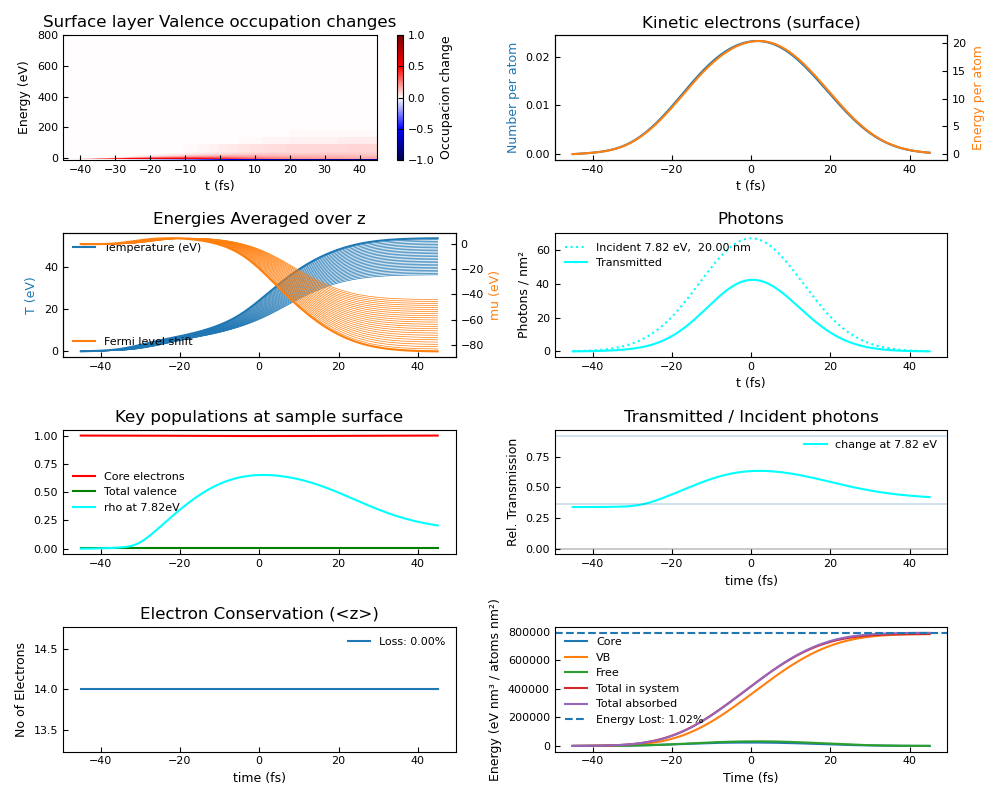

Done
Transmission:  [57.6569269]  %
CPU times: user 8min 27s, sys: 47min 54s, total: 56min 21s
Wall time: 1min 1s


In [40]:
%%time
sim_options = dict(t_span=[-45, 45],
                   method='RK45',
                   rtol=1e-4, atol=1e-8, 
                   plot = True,
                   return_full_solution = True)

incident, transmitted, sol = sim.run(**sim_options)

print('Transmission: ', 100 * transmitted/incident, ' %')


<IPython.core.display.Javascript object>


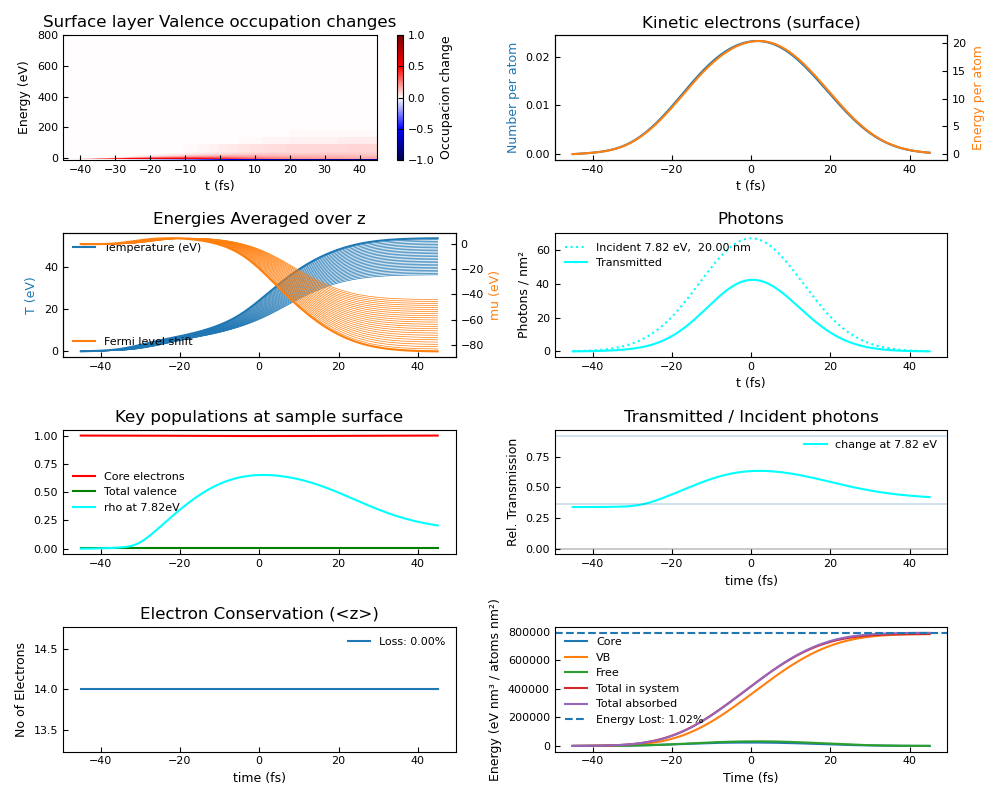

Done


In [41]:
sim.plot_results(sol, sol.photon_densities)

## Plot 1: Density of states

<>:25: DeprecationWarning: invalid escape sequence \m
<>:25: DeprecationWarning: invalid escape sequence \m
<>:25: DeprecationWarning: invalid escape sequence \m
<ipython-input-42-82a1011f3a54>:25: DeprecationWarning: invalid escape sequence \m
  plt.plot(sol.chemical_potentials[:, 0] + PAR.E_f,sol.t, 'white', label='$\mu$')


<IPython.core.display.Javascript object>


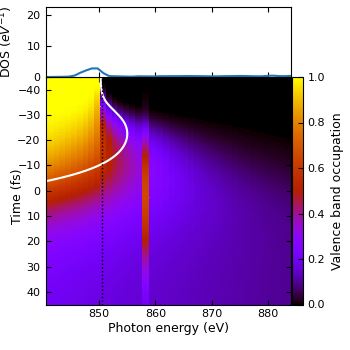

In [42]:
fig = plt.figure(figsize = (3.5,3.5))



# definitions for the axes
left, width = 0.13, 0.7
bottom, height = 0.13, 0.65
spacing = 0.005


rect_main = [left, bottom, width, height]
rect_top = [left, bottom + height , width, 0.2]
rect_colorbar = [left + width + spacing, bottom, 0.03, height]


ax =       fig.add_axes(rect_main)
ax_top   = fig.add_axes(rect_top, sharex=ax)
ax_colorbar  = fig.add_axes(rect_colorbar)


plt.sca(ax)
plt.pcolormesh(PAR.enax_j_edges+PAR.E_f,sol.t,
               (sol.rho_j[0]/np.outer(PAR.m_j,np.ones(sol.t.shape))).T,
               cmap = plt.cm.gnuplot, vmin = 0, vmax = 1, shading = 'nearest')#
plt.plot(sol.chemical_potentials[:, 0] + PAR.E_f,sol.t, 'white', label='$\mu$')

plt.ylim(np.max(sol.t), np.min(sol.t))
plt.ylabel('Time (fs)   ', labelpad = -5, fontsize = 9)
plt.xlabel('Photon energy (eV)', labelpad = 2, fontsize = 9)
plt.xlim(PAR.E_f - 10, 884)
plt.axvline(PAR.E_f, lw=1, c='k', ls = ':')
ax.tick_params(direction = 'in', axis = 'both', top = True, right = True)

plt.sca(ax_top)
ax_top.tick_params(direction = 'in', axis = 'both', top = True, labelbottom = False)

plt.plot(PAR.E_j +PAR.E_f, PAR.m_j/PAR.enax_dE_j)

plt.ylabel('DOS ($eV^{-1}$)', labelpad = 8)
plt.ylim(0, np.max(PAR.m_j/PAR.enax_dE_j)*1.1)
#plt.xticks(np.arange(840,881,5))
plt.colorbar(cax = ax_colorbar, ax = ax, label = 'Valence band occupation')
ax_colorbar.tick_params(direction = 'in', axis = 'y')

#plt.savefig('./plots/dos_development.png', dpi = 600)

# The same but horizontal

<>:43: DeprecationWarning: invalid escape sequence \m
<>:43: DeprecationWarning: invalid escape sequence \m
<>:43: DeprecationWarning: invalid escape sequence \m
<ipython-input-171-545a5250262c>:43: DeprecationWarning: invalid escape sequence \m
  plt.plot(sol.t,sol.chemical_potentials[:, 0], 'lime', label='$\mu$')


<IPython.core.display.Javascript object>


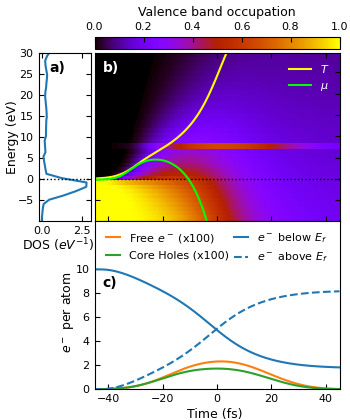

/home/engelr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:69: UserWarning: Use the colorbar set_ticks() method instead.


In [171]:
fig = plt.figure(figsize = (3.5,4.2))



# definitions for the axes
bottom = 0.073
left = 0.11
axABheight = 0.4
axBCwidth = 0.7
axA_width = 0.15
spacing = 0.005
axC_height = 0.4


rect_main = [left+axA_width+0.01, bottom+axC_height, axBCwidth, axABheight]
rect_left = [left, bottom+axC_height, axA_width, axABheight]
rect_bottom= [left+axA_width+0.01, bottom, axBCwidth, axC_height]

rect_colorbar = [left+dos_width+0.01, bottom+axC_height+axABheight+0.01, axBCwidth, 0.03]


ax =       fig.add_axes(rect_main)
ax_left  = fig.add_axes(rect_left, sharey=ax)
ax_bottom  = fig.add_axes(rect_bottom, sharex=ax)

ax_colorbar  = fig.add_axes(rect_colorbar)


### Main Plot
plt.sca(ax)
plt.annotate('b)', (-42,25), color = 'w', fontweight = 'bold')
plt.pcolormesh(sol.t, PAR.enax_j_edges,
               (sol.rho_j[0]/np.outer(PAR.m_j,np.ones(sol.t.shape))),
               cmap = plt.cm.gnuplot, vmin = 0, vmax = 1, shading = 'nearest')#


plt.xlim(np.min(sol.t), np.max(sol.t))
plt.ylim(- 10, 880-PAR.E_f)
plt.axhline(0, lw=1, c='k', ls = ':')
ax.tick_params(direction = 'in', axis = 'both', top = True, right = True)

plt.plot(sol.t,sol.temperatures[:, 0] , 'yellow', label='$T$')
plt.plot(sol.t,sol.chemical_potentials[:, 0], 'lime', label='$\mu$')
plt.axis()

legend = plt.legend()
plt.setp(legend.get_texts(), color='w')

### DOS plot
plt.sca(ax_left)
plt.annotate('a)', (0.5, 25.5), color = 'k', fontweight = 'bold')
ax_left.tick_params(direction = 'in', axis = 'both', top = True, right = True)
plt.ylabel('Energy (eV)', labelpad = -1, fontsize = 9)

plt.plot(PAR.m_j/PAR.enax_dE_j, PAR.E_j)
plt.axhline(0, lw=1, c='k', ls = ':')
plt.xlabel('DOS ($eV^{-1}$)    ', labelpad = 0)
plt.xlim(-0.2, np.max((PAR.m_j/PAR.enax_dE_j)[PAR.E_j<20])*1.1)
plt.yticks(np.arange(-5, 35,5))


### Colorbar
plt.sca(ax_colorbar)
plt.colorbar(cax = ax_colorbar, ax = ax, 
             label = 'Valence band occupation', orientation='horizontal')
ax_colorbar.tick_params(direction = 'in', axis = 'x', labelbottom = False,
                        labeltop = True, top = True, bottom = False)
ax_colorbar.xaxis.set_label_position('top') 
ax_colorbar.set_xticks([0,1])

### Populations plot
plt.sca(ax_bottom)
plt.annotate('c)', (-42,8.5), color = 'k', fontweight = 'bold')
plt.plot(sol.t,sol.R_free[0]*100, c='C1', label = 'Free $e^-$ (x100)')
plt.plot(sol.t,(PAR.M_core - sol.core[0])*100, c='C2', ls='-', label = 'Core Holes (x100)')
plt.plot(sol.t,np.sum(sol.rho_j[0,PAR.E_j<=0,:],0), 'C0-', label = '$e^-$ below $E_f$')
plt.plot(sol.t,np.sum(sol.rho_j[0,PAR.E_j>0,:],0), 'C0--', label = '$e^-$ above $E_f$')
plt.ylim(0,14)
plt.yticks(np.arange(0,12,2))
plt.legend(ncol = 2, fontsize = 8, handlelength = 1.3,
           loc = 'upper center', columnspacing = 0.4)
plt.xlabel('Time (fs) ', labelpad = 3, fontsize = 9)
plt.ylabel('$e^-$ per atom    ', labelpad = 0)

plt.savefig('./plots/dos_development.png', dpi = 600)

In [164]:
PAR.E_i[0]

7.821000000000026

# FermiSolver results

<>:6: DeprecationWarning: invalid escape sequence \m
<>:6: DeprecationWarning: invalid escape sequence \m
<>:6: DeprecationWarning: invalid escape sequence \m
<ipython-input-57-0f9474cfc330>:6: DeprecationWarning: invalid escape sequence \m
  plt.plot(sol.t, sol.chemical_potentials[:, 0]*np.nan, 'C1', label='$\mu$')


<IPython.core.display.Javascript object>


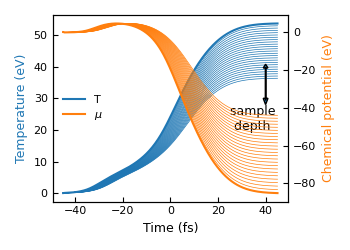

In [57]:
plt.figure(figsize = (3.5,2.5))


plt.plot(sol.t, sol.temperatures[:, 0], 'C0', label='T')
plt.plot(sol.t, sol.temperatures[:,1:], 'C0', lw = 0.5)
plt.plot(sol.t, sol.chemical_potentials[:, 0]*np.nan, 'C1', label='$\mu$')
plt.xlabel('Time (fs)')
plt.ylabel('Temperature (eV)',color='C0')
plt.legend(loc='center left')
plt.arrow(40, 40,0,-10, head_width = 2, head_length = 2)

plt.text(25, 20, 'sample \n depth', size = 9)
axcp = plt.gca().twinx()
plt.plot(sol.t, sol.chemical_potentials[:, 0], 'C1')
plt.plot(sol.t, sol.chemical_potentials[:, 1:], 'C1', lw=0.5)

plt.arrow(40, -36,0,17, head_width = 2, head_length = 2)

plt.ylabel('Chemical potential (eV)',color='C1')

plt.tight_layout()
plt.savefig('./plots/fermi_solver.png', dpi = 600)

<IPython.core.display.Javascript object>


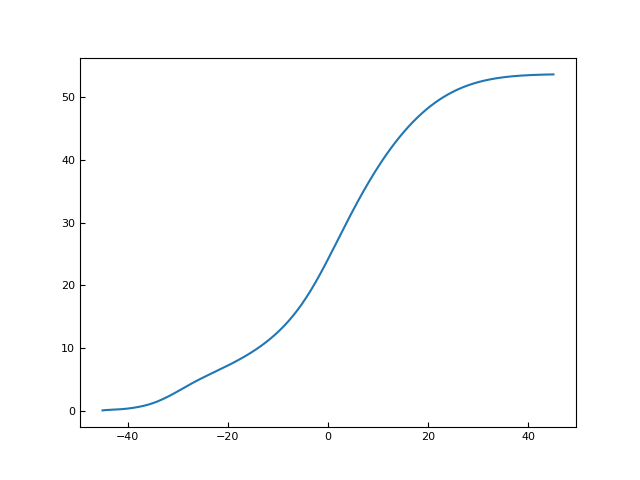

In [165]:
plt.figure()
plt.plot(sol.t, sol.temperatures[:, 0], 'C0', label='T')


## Energy Balance

### Calculate inner energies and temperatures in the VB

In [13]:
inner_energies = np.zeros((len(sol.t),PAR.Nsteps_z))
for it, t in enumerate(sol.t):
    for iz in range(PAR.Nsteps_z):
        U = np.sum(sol.rho_j[iz, :, it] * PAR.E_j)
        R = sol.R_VB[iz, it]
        T, mu_chem = PAR.FermiSolver.solve(U, R)
        if np.isnan(T):
            T, mu_chem = PAR.FermiSolver.save_lookup_Tmu_from_UR(U, R)
        # if self.DEBUG and (iz==0):
        #    print(U,R,'->',T, mu_chem)
        sol.temperatures[it, iz], sol.chemical_potentials[it, iz] = (T, mu_chem)
        inner_energies[it,iz] = U # This is needed later to check the energy conservation

### Calculate Total energy in the stack

In [14]:

## Integrat energy for each timestepsol.chemical_potentials+
absorbed_energy_dt = np.sum((sol.photon_densities[0]-sol.photon_densities[-1]).T*(PAR.E_i+PAR.E_f),1)
absorbed_energy = np.array([np.trapz(absorbed_energy_dt[:i+1],sol.t[:i+1]) for i in range(len(absorbed_energy_dt))])

factor = PAR.atomic_density * PAR.zstepsize # From energy per atom to energy per nm²
total_free = np.sum(sol.E_free[:,:],0) * factor#*1.01
total_inner = (np.sum(sol.inner_energies[:,:],1)-np.sum(sol.inner_energies[0,:])) * factor#*0.9
total_core = np.sum((PAR.M_core- sol.core[:,:])*PAR.E_f,0) * factor#*1.13

total_energies = total_free + total_inner + total_core


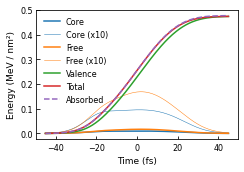

In [15]:
plt.figure(figsize = (3.5,2.5))
ax1 = plt.gca()


plt.plot(sol.t, 1e-6*total_core,'C0', label = 'Core')
plt.plot(sol.t, 1e-6*total_core*10,'C0',lw = 0.5, label = 'Core (x10)')
plt.plot(sol.t, 1e-6*total_free,'C1', label = 'Free')
plt.plot(sol.t, 1e-6*total_free*10,'C1',lw = 0.5, label = 'Free (x10)')
plt.plot(sol.t, 1e-6*total_inner,'C2', label = 'Valence')

plt.plot(sol.t, 1e-6*total_energies,'C3', label = 'Total')
plt.plot(sol.t, 1e-6*absorbed_energy,'C4', ls = '--', label = 'Absorbed')

#plt.plot(sol.t, total_free+total_core, label = 'Core+Free')

#plt.axhline(absorbed_energy[-1], ls='--', label=f'Energy Lost: {100*(absorbed_energy[-1]-total_energies[-1])/absorbed_energy[-1]:.2f}%')
plt.legend()

plt.xlabel('Time (fs)')
plt.ylabel('Energy (MeV / nm²)')
plt.tight_layout()
plt.savefig('./plots/energy_conservation.png', dpi = 600)

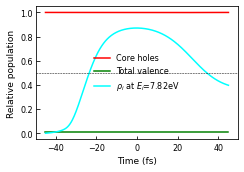

In [16]:
plt.figure(figsize = (3.5,2.5))
#plt.title('Key populations at sample surface')
plt.plot(sol.t,sol.core[0]/PAR.M_core, c='red', label = 'Core holes')
plt.plot(sol.t,(sol.R_VB[0])/PAR.M_VB, c='green',label = 'Total valence')
cols = plt.cm.cool(np.linspace(0,1,PAR.N_photens))
for iE,E in enumerate(PAR.E_i):
    plt.plot(sol.t,sol.rho_j[:,PAR.resonant,:][0,iE].T/PAR.m_j[PAR.resonant][iE],c = cols[iE], label = '$\\rho_i$ at $E_i$='+f'{E:.2f}eV')
plt.axhline(0.5, ls = '--', color = 'k', lw=0.5)
plt.legend()
plt.xlabel('Time (fs)')
plt.ylabel('Relative population')
plt.tight_layout()
plt.savefig('./plots/population_development.png', dpi = 600)

In [17]:
sol.rho_j.shape

(50, 90, 302)

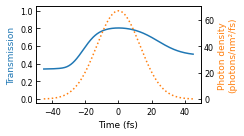

In [18]:
T = (sol.photon_densities[-1]/sol.photon_densities[0])#/np.max(sol.photon_densities[0],1)

plt.figure(figsize = (3.5,2.))
plt.plot(sol.t,T.T, c= 'C0')#, label = f'change at {E:.2f} eV')
plt.ylabel('Transmission', c='C0')
plt.ylim(-0.05,1.05)
plt.xlabel('Time (fs)')

plt.gca().twinx()
plt.plot(sol.t,sol.photon_densities[0][0], ':',c = 'C1')

plt.ylabel('Photon density\n(photons/nm²/fs)', c='C1')

#plt.axhline(c='k', lw = 0.3)
#plt.legend()

#plt.title('Transmitted - Incident photons')
plt.tight_layout()
plt.savefig('./plots/transmission_curve.png', dpi = 600)

Text(0, 0.5, 'energy (eV)')

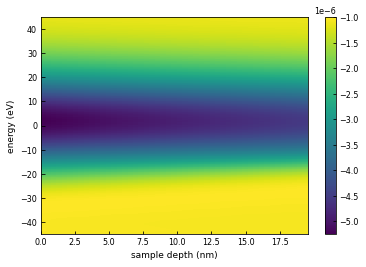

In [19]:
plt.figure()
plt.pcolormesh(PAR.zaxis,sol.t,( (sol.R_VB-PAR.R_VB_0)/PAR.M_VB).T)
plt.colorbar()
plt.xlabel('sample depth (nm)')
plt.ylabel('energy (eV)')

Text(0.5, 0, 'energy (eV)')

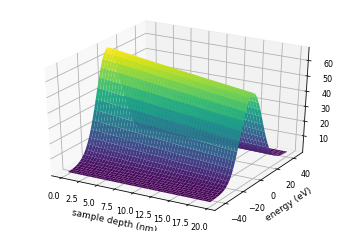

In [20]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(PAR.zaxis, sol.t)
Z =  sol.photon_densities[:-1,0,:].T


ax.plot_surface(X, Y, Z, cmap='viridis')
plt.xlabel('sample depth (nm)')
plt.ylabel('energy (eV)')
#ax.set_zlabel('Relative vale');


In [21]:
45/17

2.6470588235294117

In [22]:
rg = 12/17
print(rg/0.8)
Rg = 90/17
print((Rg)/6)

0.8823529411764706
0.8823529411764706


In [23]:
re = 6/17
print(re/0.8)
Re = 45/17
print((Re)/6)

0.4411764705882353
0.4411764705882353


In [24]:
(17/45)/6

0.06296296296296296

In [25]:
3-re

2.6470588235294117

In [26]:
Re

2.6470588235294117

In [27]:
22.5/8.5

2.6470588235294117

In [28]:
0.8*2.64/6

0.35200000000000004

In [29]:
re

0.35294117647058826

In [30]:
6/17

0.35294117647058826

In [31]:
0.35/0.8

0.43749999999999994

In [32]:
2.64/6

0.44